In [15]:
%pylab inline
from sklearn import metrics
from sklearn.model_selection import train_test_split #to split in train and test set
from sklearn.linear_model import LogisticRegression #logistic regression classifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score #BONUS: to tune parameters using cross-validation
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


In [17]:
#Data is a bunch of columns with different features.
#1 - month
#3 - day of the week
#4 - airline
#7 - departure airport
#8 - arrival airport
#9 - departure time
#and also target:
#11 - delay time -> later converted into 0-1 value of delay/ontime

my_data = pd.read_csv('selectedsmalldataset.csv', usecols=[1,3,4,7,8,9,11])

# Create a set of dummy variables from the variable. 
# They say all over the internets that this is how you're supposed to handle categorical vars like strings etc.
df_dummies = pd.get_dummies(my_data.iloc[:,[2,3,4]])

#convert hours and minutes to just hours
for index, row in my_data.iterrows():
    row[5] = np.ceil(flights['SCHEDULED_DEPARTURE']/600).apply(int)
    math.floor(int(row[5])/100)
    
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
def day_31_to_365(x):
    days_365 = days_in_month[:x['MONTH']-1].sum() + x['DAY']
    return days_365

#get values for the target (delay on departure)
yVal = np.array(my_data.iloc[:,[6]]).reshape(shape(my_data)[0],)
y = []

#delay has three values: no delay (0), slight delay (1) and significant delay (2)
for value in yVal:
    if value <=10:
        tgt = 0
    elif value <=30:
        tgt = 1
    else:
        tgt = 2
    y.append(tgt)


#remove targets and columns that were converted into dummy variables
my_data = my_data.drop(my_data.columns[[2, 3, 4, 6]], axis=1)

#concat my_data and dummies and generate a np.ndarray of features
df_new = pd.concat([my_data, df_dummies], axis=1)
X = df_new.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

#split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)



/Users/konradkrawczyk/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
def svm():
    
    #prepare c-values for cross validation
    cVal = [0.01, 0.03, 0.1, 0.3]
    
    print('------------------------SUPPORT VECTOR MACHINE:------------------------')
    print('');
    print('Cross-Validation: means & stds for given c-values');
    #define the classifier
    cv_svmClass = LinearSVC(class_weight="balanced")
    #use GridSearchCV to generate the best c-value for a classifier, from the cVal array
    cv_svm = GridSearchCV(estimator=cv_svmClass, param_grid = dict(C=cVal), cv=10, scoring='accuracy')
    cv_svm.fit(X_train, y_train)
    #print the mean and s.dev. scores for every c-value for comparison
    means_cv_svm = cv_svm.cv_results_['mean_test_score']
    stds_cv_svm = cv_svm.cv_results_['std_test_score']

    #fit the data
    #get the best c-value from grid search
    best = cv_svm.best_params_['C']

    #define logistic regression using the best value
    cv_svmBest = LinearSVC(C=best, class_weight="balanced")
    #fit the training data
    cv_svmBest.fit(X_train, y_train)
    #get the estimates
    predicted = cv_svmBest.predict(X_test)
    
    print('Best score: {}'.format(best))
    print()
    print('Classification report for the best c-parameter (test set):')
    print(classification_report(y_test, predicted))
    print()
    print('Confusion matrix for the best c-parameter (test set):')
    print(metrics.confusion_matrix(y_test, predicted))
    
svm()

------------------------RANDOM FOREST:------------------------

Cross-Validation: means & stds for given

Best score: 2

Classification report for the best c-parameter (test set):
             precision    recall  f1-score   support

          0       0.79      0.94      0.86     18505
          1       0.19      0.06      0.09      2653
          2       0.21      0.06      0.10      2532

avg / total       0.66      0.75      0.69     23690


Confusion matrix for the best c-parameter (test set):
[[17463   578   464]
 [ 2339   161   153]
 [ 2242   127   163]]


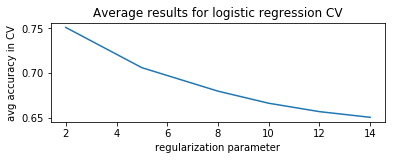

In [13]:
def forest():
    
    #prepare c-values for cross validation
    cVal = [2, 5, 8, 10, 12, 14]
    
    print('------------------------RANDOM FOREST:------------------------')
    print('');
    print('Cross-Validation: means & stds for given');
    #define the classifier
    cv_forestClass = RandomForestClassifier(class_weight="balanced")
    #use GridSearchCV to generate the best c-value for a classifier, from the cVal array
    cv_forest = GridSearchCV(estimator=cv_forestClass, param_grid = dict(min_samples_split=cVal), cv=10, scoring='accuracy')
    #fit the data
    cv_forest.fit(X_train, y_train)
    #print the mean and s.dev. scores for every c-value for comparison
    means_cv_forest = cv_forest.cv_results_['mean_test_score']
    stds_cv_forest = cv_forest.cv_results_['std_test_score']
    #for mean, std, params in zip(means_cv_reg, stds_cv_reg, cv_reg.cv_results_['params']):
        #print("Mean: %0.5f | Standard Deviation:(+/-%0.03f) | for %r" % (mean, std * 2, params))
    #print()
    
    #plot the mean accuracies for logistic regression CV
    ax1 = plt.subplot("211")
    ax1.set_title("Average results for logistic regression CV")
    ax1.set_ylabel('avg accuracy in CV')
    ax1.set_xlabel('regularization parameter')
    ax1.plot(cVal, means_cv_forest)
    print()
    
    #get the best c-value from grid search
    best = cv_forest.best_params_['min_samples_split']
    #define logistic regression using the best value
    cv_forestBest = RandomForestClassifier(min_samples_split=best, class_weight="balanced")
    #fit the training data
    cv_forestBest.fit(X_train, y_train)
    #get the estimates
    predicted = cv_forestBest.predict(X_test)
    
    print('Best score: {}'.format(best))
    print()
    print('Classification report for the best c-parameter (test set):')
    print(classification_report(y_test, predicted))
    print()
    print('Confusion matrix for the best c-parameter (test set):')
    print(metrics.confusion_matrix(y_test, predicted))
    
forest()

------------------------LOGISTIC REGRESSION:------------------------

Cross-Validation: means & stds for given c-values

Best score: 0.01

Classification report for the best c-parameter (test set):
             precision    recall  f1-score   support

          0       0.79      0.96      0.87      3063
          1       0.29      0.01      0.02       429
          2       0.17      0.07      0.10       431

avg / total       0.67      0.76      0.69      3923


Confusion matrix for the best c-parameter (test set):
[[2939    7  117]
 [ 392    5   32]
 [ 395    5   31]]


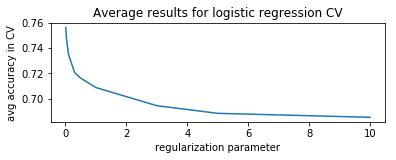

In [65]:
def logRegr():
    
    #prepare c-values for cross validation
    cVal = [0.01, 0.03, 0.1, 0.3, 0.5, 1., 3., 5., 10.]
    
    print('------------------------LOGISTIC REGRESSION:------------------------')
    print('');
    print('Cross-Validation: means & stds for given c-values');
    #define the classifier
    cv_regClass = LogisticRegression(class_weight="balanced")
    #use GridSearchCV to generate the best c-value for a classifier, from the cVal array
    cv_reg = GridSearchCV(estimator=cv_regClass, param_grid = dict(C=cVal), cv=10, scoring='accuracy')
    #fit the data
    cv_reg.fit(X_train, y_train)
    #print the mean and s.dev. scores for every c-value for comparison
    means_cv_reg = cv_reg.cv_results_['mean_test_score']
    stds_cv_reg = cv_reg.cv_results_['std_test_score']
    #for mean, std, params in zip(means_cv_reg, stds_cv_reg, cv_reg.cv_results_['params']):
        #print("Mean: %0.5f | Standard Deviation:(+/-%0.03f) | for %r" % (mean, std * 2, params))
    #print()
    
    #plot the mean accuracies for logistic regression CV
    ax1 = plt.subplot("211")
    ax1.set_title("Average results for logistic regression CV")
    ax1.set_ylabel('avg accuracy in CV')
    ax1.set_xlabel('regularization parameter')
    ax1.plot(cVal, means_cv_reg)
    print()
    
    #get the best c-value from grid search
    best = cv_reg.best_params_['C']
    #define logistic regression using the best value
    cv_regBest = LogisticRegression(C=best, class_weight="balanced")
    #fit the training data
    cv_regBest.fit(X_train, y_train)
    #get the estimates
    predicted = cv_regBest.predict(X_test)
    
    print('Best score: {}'.format(best))
    print()
    print('Classification report for the best c-parameter (test set):')
    print(classification_report(y_test, predicted))
    print()
    print('Confusion matrix for the best c-parameter (test set):')
    print(metrics.confusion_matrix(y_test, predicted))
    
logRegr()

------------------------NEURAL NETWORK:------------------------

Cross-Validation: means & stds for given

Best score: (5,)

Classification report for the best c-parameter (test set):
             precision    recall  f1-score   support

          0       0.78      1.00      0.88     18553
          1       0.00      0.00      0.00      2639
          2       0.13      0.00      0.00      2498

avg / total       0.63      0.78      0.69     23690


Confusion matrix for the best c-parameter (test set):
[[18535     0    18]
 [ 2630     0     9]
 [ 2494     0     4]]


/Users/konradkrawczyk/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


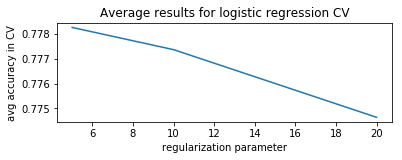

In [18]:
def mlp():
    

    #prepare c-values for cross validation
    hidden = [(5,), (10,), (20,)]
    
    print('------------------------NEURAL NETWORK:------------------------')
    print('');
    print('Cross-Validation: means & stds for given');
    #define the classifier
    cv_mlpClass = MLPClassifier()
    #use GridSearchCV to generate the best c-value for a classifier, from the cVal array
    cv_mlp = GridSearchCV(estimator=cv_mlpClass, param_grid = dict(hidden_layer_sizes=hidden), cv=10, scoring='accuracy')
    #fit the data
    cv_mlp.fit(X_train, y_train)
    #print the mean and s.dev. scores for every c-value for comparison
    means_cv_mlp = cv_mlp.cv_results_['mean_test_score']
    stds_cv_mlp = cv_mlp.cv_results_['std_test_score']
    #for mean, std, params in zip(means_cv_reg, stds_cv_reg, cv_reg.cv_results_['params']):
        #print("Mean: %0.5f | Standard Deviation:(+/-%0.03f) | for %r" % (mean, std * 2, params))
    #print()
    
    #plot the mean accuracies for logistic regression CV
    ax1 = plt.subplot("211")
    ax1.set_title("Average results for nn CV")
    ax1.set_ylabel('avg accuracy in CV')
    ax1.set_xlabel('hidden layer number')
    ax1.plot(hidden, means_cv_mlp)
    print()
    
    #get the best c-value from grid search
    best = cv_mlp.best_params_['hidden_layer_sizes']
    #define logistic regression using the best value
    cv_mlpBest = MLPClassifier(hidden_layer_sizes=best)
    #fit the training data
    cv_mlpBest.fit(X_train, y_train)
    #get the estimates
    predicted = cv_mlpBest.predict(X_test)
    
    print('Best score: {}'.format(best))
    print()
    print('Classification report for the best hidden layer number (test set):')
    print(classification_report(y_test, predicted))
    print()
    print('Confusion matrix for the best hidden layer number (test set):')
    print(metrics.confusion_matrix(y_test, predicted))
    
mlp()